<a href="https://colab.research.google.com/github/jingyiluo07/MSSP607/blob/main/Participation_Activity_Week8_Exercises_Jingyi_Luo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/MSSP-607/Assignments'

Mounted at /content/drive
'Internet Sales.csv'  'Student Performance Data.csv'   yearly_sales.pdf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
sales_data = pd.read_csv('/content/drive/MyDrive/MSSP-607/Assignments/Internet Sales.csv')

<ipython-input-18-15fdec7563c2>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('/content/drive/MyDrive/MSSP-607/Assignments/Internet Sales.csv')


2.  Use Google Colabs and Python to create an Internet Sales forecast for the next five years.

In [ ]:
sales_data['Year'] = pd.to_datetime(sales_data['OrderDate']).dt.year
yearly_sales = sales_data.groupby('Year').agg({'SalesAmount': 'sum'}).reset_index()

x_yearly = yearly_sales[['Year']]
y_yearly = yearly_sales['SalesAmount']
model_yearly = LinearRegression().fit(x_yearly, y_yearly)

forecast_years = np.array(range(x_yearly['Year'].max() + 1, x_yearly['Year'].max() + 1 + 5)).reshape(-1, 1)
forecast_sales_yearly = model_yearly.predict(forecast_years)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


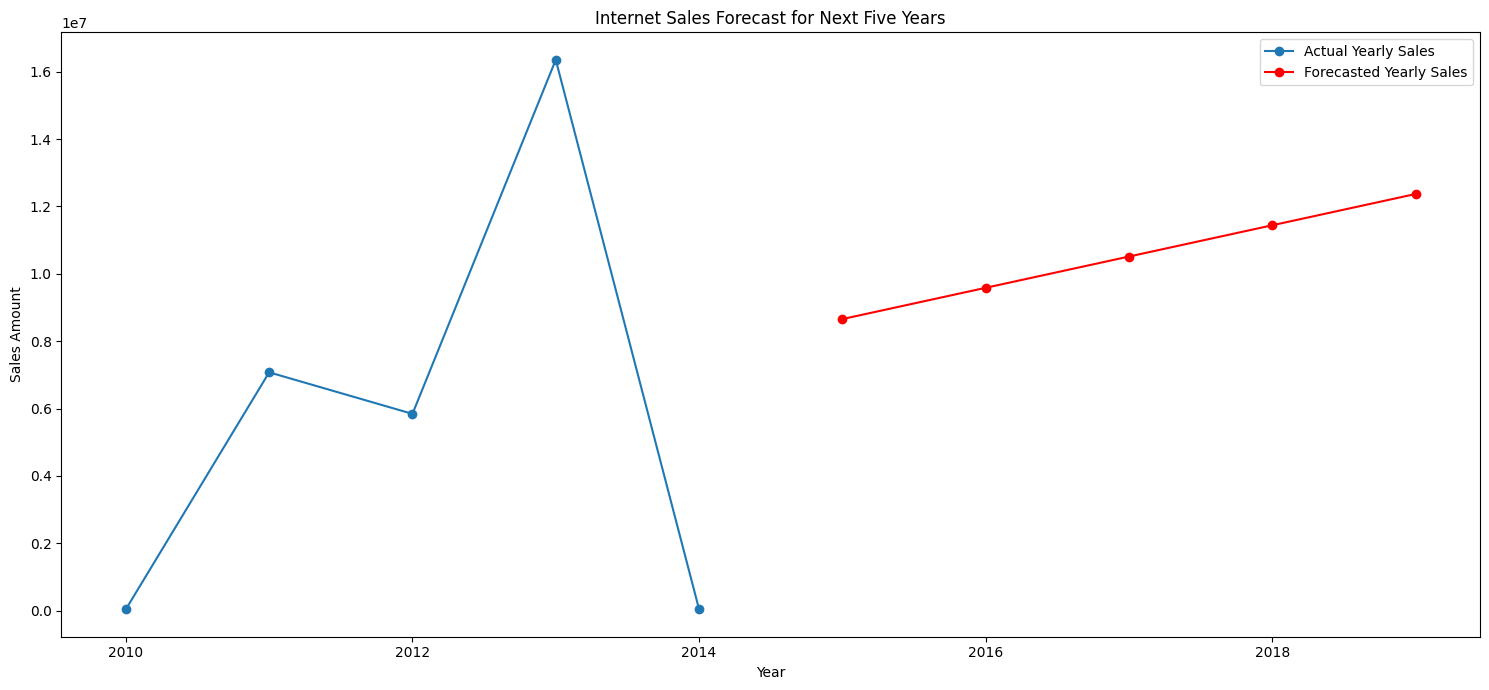

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(yearly_sales['Year'], yearly_sales['SalesAmount'], label='Actual Yearly Sales', marker='o')
plt.plot(forecast_years, forecast_sales_yearly, label='Forecasted Yearly Sales', color='red', marker='o')
plt.title('Internet Sales Forecast for Next Five Years')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.legend()
plt.tight_layout()
plt.show()

3. Using summary statistics, which product will generate the most sales?

In [ ]:
product_sales_summary = sales_data.groupby('EnglishProductName')['SalesAmount'].sum()

top_selling_product = product_sales_summary.idxmax()
top_selling_sales_amount = product_sales_summary.max()

top_selling_product, top_selling_sales_amount


('Mountain-200 Black, 46', 1373469.5481999998)

Answer: The product Mountain-200 Black, 46 has generated the most sales.